In [47]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Set style for better visualization
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [48]:
# Load the filtered 9-column dataset
file_path = 'master_dataset_all_cycles.csv'
df = pd.read_csv(file_path)
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.head()

Dataset shape: (104379, 9)
Columns: ['SEQN', 'Cycle', 'RIAGENDR', 'RIDAGEYR', 'BMXBMI', 'BPXSY1', 'LBXGLU', 'LBXSCH', 'Log_UACR']


,SEQN,Cycle,RIAGENDR,RIDAGEYR,BMXBMI,BPXSY1,LBXGLU,LBXSCH,Log_UACR
0,73557.0,2013-2014,1.0,69.0,26.7,122.0,105.0,168.0,2.487404
1,73557.0,2013-2014,1.0,69.0,26.7,122.0,105.0,168.0,2.487404
2,73558.0,2013-2014,1.0,54.0,28.6,156.0,105.0,167.0,5.726848
3,73558.0,2013-2014,1.0,54.0,28.6,156.0,105.0,167.0,5.726848
4,73558.0,2013-2014,1.0,54.0,28.6,156.0,105.0,167.0,5.726848


In [49]:
df.info()

df.describe().T



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104379 entries, 0 to 104378
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   SEQN      104379 non-null  float64
 1   Cycle     104379 non-null  object 
 2   RIAGENDR  104379 non-null  float64
 3   RIDAGEYR  104379 non-null  float64
 4   BMXBMI    104379 non-null  float64
 5   BPXSY1    104379 non-null  float64
 6   LBXGLU    104379 non-null  float64
 7   LBXSCH    104379 non-null  float64
 8   Log_UACR  104379 non-null  float64
dtypes: float64(8), object(1)
memory usage: 7.2+ MB


,count,mean,std,min,25%,50%,75%,max
SEQN,104379.0,102939.267515,18978.350723,7.355700e+04,86641.000000,99530.000000,118166.500000,142310.000000
RIAGENDR,104379.0,1.521676,0.499532,1.000000e+00,1.000000,2.000000,2.000000,2.000000
RIDAGEYR,104379.0,46.276761,25.872730,5.397605e-79,21.000000,53.000000,68.000000,80.000000
BMXBMI,104379.0,28.672197,7.967381,1.110000e+01,23.900000,28.000000,32.400000,92.300000
BPXSY1,104379.0,124.271060,17.973562,5.200000e+01,114.000000,122.000000,131.000000,236.000000
LBXGLU,104379.0,110.248968,27.670235,2.100000e+01,105.000000,105.000000,105.000000,561.000000
LBXSCH,104379.0,179.613131,36.348870,6.300000e+01,160.000000,177.000000,193.000000,639.000000
Log_UACR,104379.0,2.637618,1.142725,7.696104e-02,1.981001,2.337952,2.872717,9.959545


In [50]:
df.shape

(104379, 9)

In [51]:
df.nunique()

SEQN        56893
Cycle           5
RIAGENDR        2
RIDAGEYR       81
BMXBMI        542
BPXSY1        160
LBXGLU        320
LBXSCH        311
Log_UACR     6636
dtype: int64

In [52]:
# Check for missing values
print("=== Missing Values ===")
print(df.isnull().sum())

# Check for duplicates
print("\n=== Duplicate Rows ===")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

=== Missing Values ===
SEQN        0
Cycle       0
RIAGENDR    0
RIDAGEYR    0
BMXBMI      0
BPXSY1      0
LBXGLU      0
LBXSCH      0
Log_UACR    0
dtype: int64

=== Duplicate Rows ===
Number of duplicate rows: 47486


In [53]:
# Remove duplicates and keep the first occurrence
initial_count = len(df)
df = df.drop_duplicates()
final_count = len(df)

# Show results
print(f"Removed {initial_count - final_count} duplicate rows")
print(f"Original rows: {initial_count}")
print(f"Rows after removing duplicates: {final_count}")

Removed 47486 duplicate rows
Original rows: 104379
Rows after removing duplicates: 56893


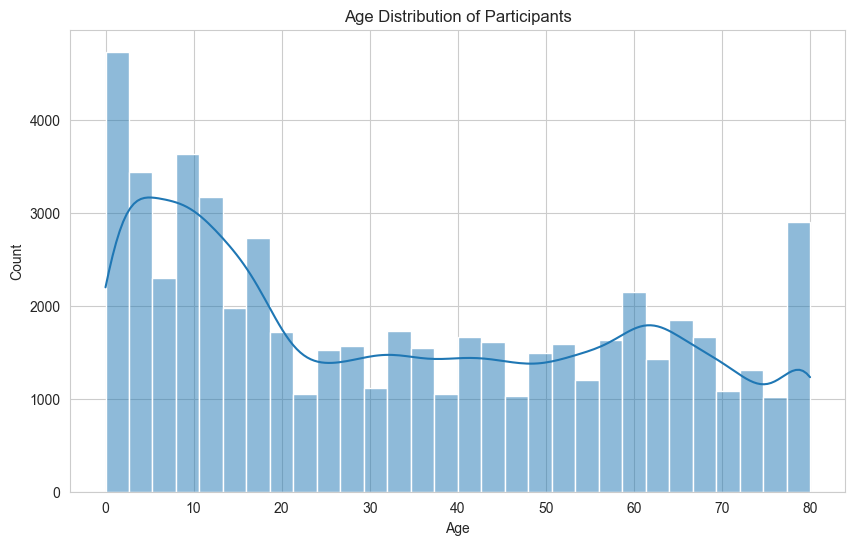

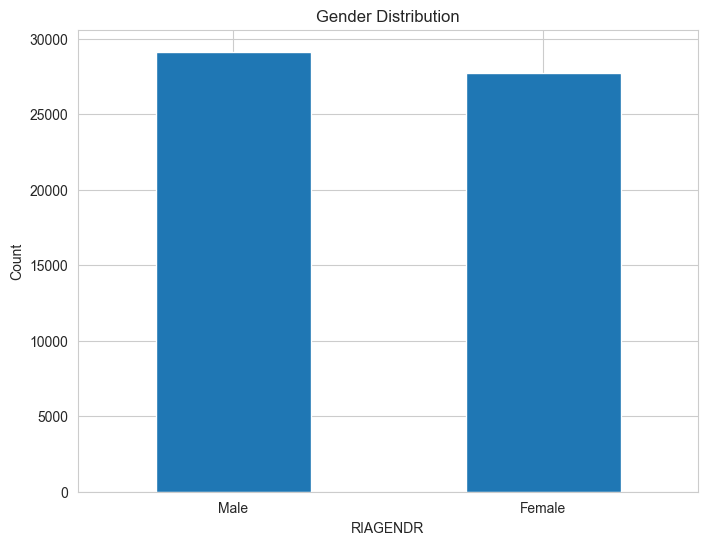

In [54]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='RIDAGEYR', bins=30, kde=True)
plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Gender distribution
plt.figure(figsize=(8, 6))
df['RIAGENDR'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)
plt.ylabel('Count')
plt.show()

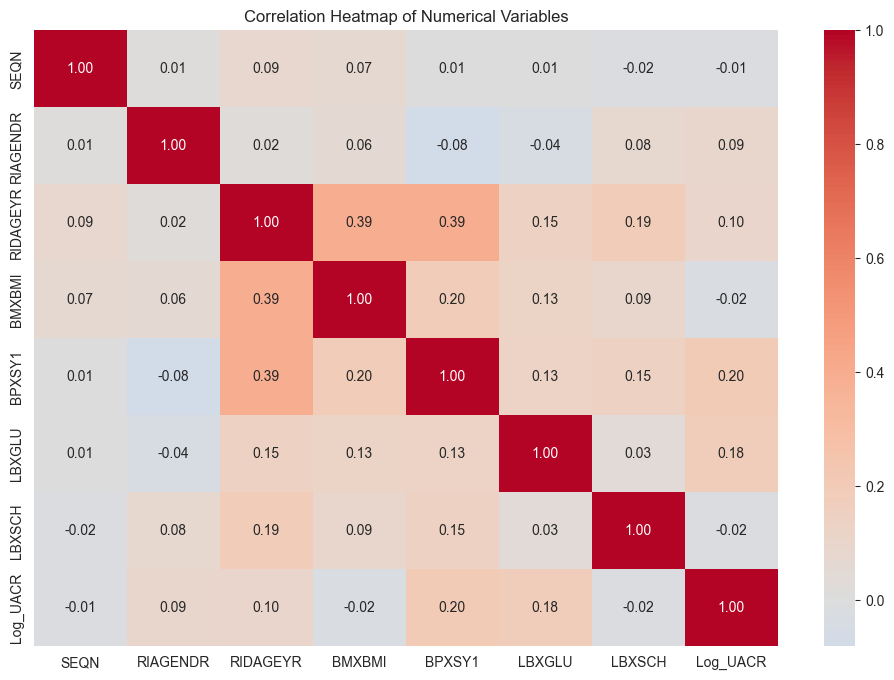

In [55]:

# Correlation heatmap for numerical columns only
plt.figure(figsize=(12, 8))
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numerical_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

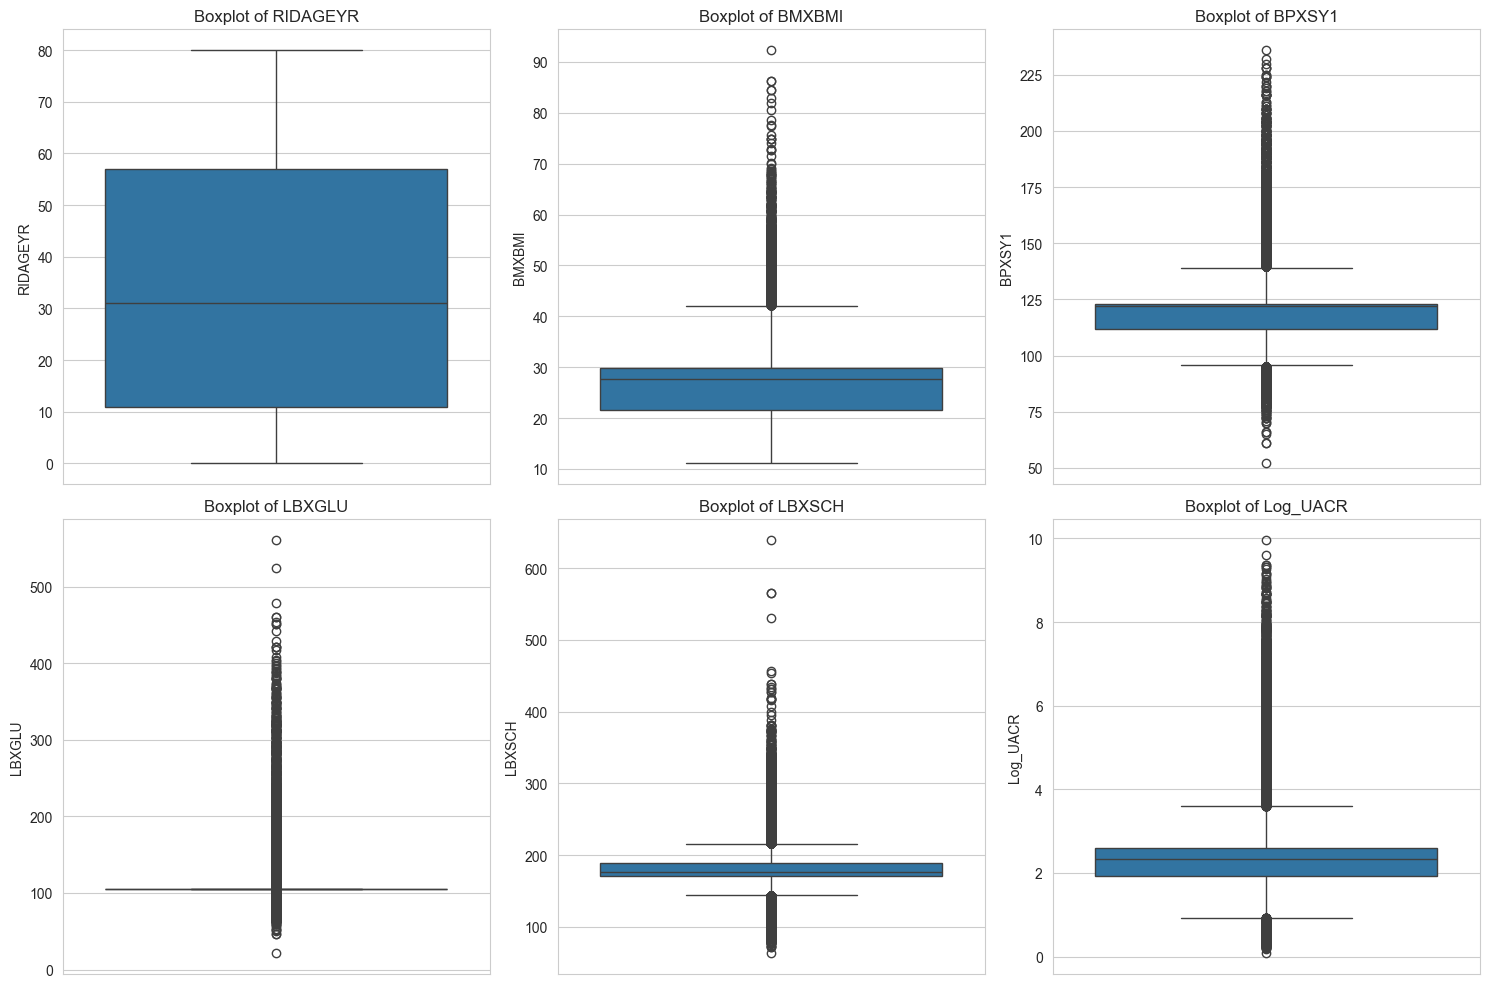

In [56]:
# Box plots for numerical features
numerical_cols = ['RIDAGEYR', 'BMXBMI', 'BPXSY1', 'LBXGLU', 'LBXSCH', 'Log_UACR']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [57]:
# Create age groups
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '65+']
df['AgeGroup'] = pd.cut(df['RIDAGEYR'], bins=bins, labels=labels, right=False)

# Display the new age groups
print("Age Group Distribution:")
print(df['AgeGroup'].value_counts().sort_index())

Age Group Distribution:
AgeGroup
0-18     21086
19-35     9589
36-50     7874
51-65     9163
65+       9181
Name: count, dtype: int64
